In [2]:
using LinearAlgebra

In [3]:
""" 
Podatkovni tip za pasovno matriko.
Hrani vektor za diagonalo, vektor vektorjev za neničelne vrstice pod diagonalo in vektor vektorjev za neničelne vrstice nad diagonalo

A = PasovnaMatrika([1,1,1],[[2,2],[3]],[[4,4]]) -> 
[1 4 0]
[2 1 4]
[3 2 1]

"""

struct PasovnaMatrika{T} <: AbstractArray{T,2}
        d::Vector{T}  
        s::Vector{Vector{T}}
        z::Vector{Vector{T}}
end

import Base:size,getindex,setindex!

"""
    size(A)

    Vrne velikost pasovne matrike

"""

function size(A::PasovnaMatrika)
    return (size(A.d)[1],size(A.d)[1])
end

"""
    getindex(A,I) ali A[i,j]

    Vrne element na mestu i,j

"""

function getindex(A::PasovnaMatrika, I::Vararg{Int,2})
    
    if I > size(A)
        return 0
    end
    
    i =  I[1] - I[2]

    if i == 0
        return A.d[I[1]]
    end
    if i > 0 && i <= size(A.s)[1]
        return A.s[i][I[1]-i]
    end
    i = -i
    if i > 0 && i <= size(A.z)[1]
        return A.z[i][I[2]-i]
    end
    return 0

end

"""
    setindex(A,v,I) ali A[i,j] = v

    Nastavi element na mestu i, j na v, ce je to mesto v pasu, drugače ne naredi ničesar.

"""

function setindex!(A::PasovnaMatrika, v, I::Vararg{Int,2})
    
    if I > size(A)
        return
    end
    
    i =  I[1] - I[2]

    if i == 0
        A.d[I[1]] = v
    end
    if i > 0 && i <= size(A.s)[1]
        A.s[i][I[1]-i] = v
    end
    i = -i
    if i > 0 && i <= size(A.z)[1]
        A.z[i][I[2]-i] = v
    end
end

setindex! (generic function with 128 methods)

In [4]:
""" 
Podatkovni tip za zgornje pasovno matriko.
Hrani vektor za diagonalo in vektor vektorjev za neničelne vrstice nad diagonalo

A = ZgornjePasovnaMatrika([1,1,1],[[4,4]]) -> 
[1 4 0]
[0 1 4]
[0 0 1]

"""

struct ZgornjePasovnaMatrika{T} <: AbstractArray{T,2}
        d::Vector{T}  
        z::Vector{Vector{T}}
end

import Base:size,getindex,setindex!

"""
    size(A)

    Vrne velikost pasovne matrike

"""

function size(A::ZgornjePasovnaMatrika)
    return (size(A.d)[1],size(A.d)[1])
end

"""
    getindex(A,I) ali A[i,j]

    Vrne element na mestu i,j

"""

function getindex(A::ZgornjePasovnaMatrika, I::Vararg{Int,2})
    
    if I > size(A)
        return 0
    end
    
    i =  I[1] - I[2]

    if i == 0
        return A.d[I[1]]
    end
    i = -i
    if i > 0 && i <= size(A.z)[1]
        return A.z[i][I[2]-i]
    end
    return 0

end

"""
    setindex(A,v,I) ali A[i,j] = v

    Nastavi element na mestu i, j na v, ce je to mesto v pasu, drugače ne naredi ničesar.

"""

function setindex!(A::ZgornjePasovnaMatrika, v, I::Vararg{Int,2})
    
    if I > size(A)
        return
    end
    
    i =  I[1] - I[2]

    if i == 0
        A.d[I[1]] = v
    end
    i = -i
    if i > 0 && i <= size(A.z)[1]
        A.z[i][I[2]-i] = v
    end
end

setindex! (generic function with 129 methods)

In [5]:
""" 
Podatkovni tip za spodnje pasovno matriko.
Hrani vektor za diagonalo in vektor vektorjev za neničelne vrstice pod diagonalo

A = PasovnaMatrika([1,1,1],[[2,2],[3]]) -> 
[1 0 0]
[2 1 0]
[3 2 1]

"""

struct SpodnjePasovnaMatrika{T} <: AbstractArray{T,2}
        d::Vector{T}  
        s::Vector{Vector{T}}
end

import Base:size,getindex,setindex!

"""
    size(A)

    Vrne velikost pasovne matrike

"""

function size(A::SpodnjePasovnaMatrika)
    return (size(A.d)[1],size(A.d)[1])
end

"""
    getindex(A,I) ali A[i,j]

    Vrne element na mestu i,j

"""

function getindex(A::SpodnjePasovnaMatrika, I::Vararg{Int,2})
    
    if I > size(A)
        return 0
    end
    
    i =  I[1] - I[2]

    if i == 0
        return A.d[I[1]]
    end
    if i > 0 && i <= size(A.s)[1]
        return A.s[i][I[1]-i]
    end
    return 0

end

"""
    setindex(A,v,I) ali A[i,j] = v

    Nastavi element na mestu i, j na v, ce je to mesto v pasu, drugače ne naredi ničesar.

"""

function setindex!(A::SpodnjePasovnaMatrika, v, I::Vararg{Int,2})
    
    if I > size(A)
        return
    end
    
    i =  I[1] - I[2]

    if i == 0
        A.d[I[1]] = v
    end
    if i > 0 && i <= size(A.s)[1]
        A.s[i][I[1]-i] = v
    end
end

setindex! (generic function with 130 methods)

In [167]:
import Base:*, \
import LinearAlgebra:lu

"""
    A*v
    Množenje pasovne matrike A s vektorjem v
"""

function *(A::PasovnaMatrika, v::Vector)
    y = zeros(size(A.d))
    
    for i = 1 : size(A.d)[1]
       y[i] = v[i] * A.d[i]
    end
    
    for i = 1 : size(A.s)[1]
       for j = 1 : size(A.s[i])[1]
            y[j+i] += v[j] * A.s[i][j]
        end
    end
    
    for i = 1 : size(A.z)[1]
       for j = 1 : size(A.z[i])[1]
            y[j] += v[j+i] * A.z[i][j]
        end
    end
    
    return y
end

"""
    A*v
    Množenje zgornje pasovne matrike A s vektorjem v
"""

function *(A::ZgornjePasovnaMatrika, v::Vector)
    y = zeros(size(A.d))
    
    for i = 1 : size(A.d)[1]
       y[i] = v[i] * A.d[i]
    end
    
    for i = 1 : size(A.z)[1]
       for j = 1 : size(A.z[i])[1]
            y[j] += v[j+i] * A.z[i][j]
        end
    end
    
    return y
end

"""
    A*v
    Množenje spodnje pasovne matrike A s vektorjem v
"""

function *(A::SpodnjePasovnaMatrika, v::Vector)
    y = zeros(size(A.d))
    
    for i = 1 : size(A.d)[1]
       y[i] = v[i] * A.d[i]
    end
    
    for i = 1 : size(A.s)[1]
       for j = 1 : size(A.s[i])[1]
            y[j+i] += v[j] * A.s[i][j]
        end
    end
    
    return y
end

"""
    L, U = lu(A)
    Izračuna LU razcep, če je matrika diagonalno dominantna.
    L je tipa SpodnjeTrikotnaMatrika, U pa ZgornjeTrikotnaMatrika
"""

function lu(A::PasovnaMatrika)
    
    #test whether matrix is diagonaly dominant
    for i = 1:length(A.d)   
        @assert 2*A[i,i] >= sum(A[i,:])     #matrix is not diagonaly dominant!
    end
    
    n = length(A.d)
    ns = length(A.s)
    nz = length(A.z)
    
    U = PasovnaMatrika(deepcopy(A.d),deepcopy(A.s),deepcopy(A.z))
    #U = copy(A)
    L = SpodnjePasovnaMatrika(ones(length(A.d)),deepcopy(A.s))

    #Calculate L and U through gauss elimination
    for i = 1:n-1
        for j = i+1:i+ns
            if j > n
                break
            end
            l = U[j,i]/U[i,i]
            L[j,i] = l
            U[j,:] -= U[i,:]*l
        end
    end

    U = ZgornjePasovnaMatrika(U.d,U.z)
    
    return L, U
end

"""
    x = A\b
    Izračuna sistem A*x=b
"""

function \(A::PasovnaMatrika, b::Vector)
     
    x = copy(b)
    n = length(b)
    ns = length(A.s)
    nz = length(A.z)

    #gauss elimination
    for i = 1:n-1
        for j = i+1:i+ns
            if j > n
                break
            end
            #row = A[i,:]
            l = A[j,i]/A[i,i]
            A[j,:] -= A[i,:]*l
            x[j] -= x[i]*l
        end
    end
    
    #calculate solution row by row
    for i = n:-1:1
        temp = x[i]
        for j = i+1:n

            if j > nz+i
                break
            end
            temp -= x[j]*A[i,j]

        end
        x[i] = temp/A[i,i]
    end
    
    return x
end

"""
    x = A\b
    Izračuna sistem A*x=b
"""

function \(A::ZgornjePasovnaMatrika, b::Vector)
     
    x = copy(b)
    n = length(b)
    nz = length(A.z)
    
    #calculate solution row by row
    for i = n:-1:1
        temp = x[i]
        for j = i+1:n
            if j > nz+i
                break
            end
            temp -= x[j]*A[i,j]
        end
        x[i] = temp/A[i,i]
    end
    
    return x
end

"""
    x = A\b
    Izračuna sistem A*x=b
"""

function \(A::SpodnjePasovnaMatrika, b::Vector)
     
    x = copy(b)
    n = length(b)
    ns = length(A.s)

    #gauss elimination
    for i = 1:n-1
        for j = i+1:i+ns
            if j > n
                break
            end
            l = A[j,i]/A[i,i]
            A[j,:] -= A[i,:]*l
            x[j] -= x[i]*l
        end
    end
    
    #read the solution
    for i = n:-1:1
        x[i] = x[i]/A[i,i]
    end
    
    return x
end

\ (generic function with 175 methods)

In [7]:
using Test

@testset "matrike" begin
    A = [1 2 3 ; 4 5 6 ; 7 8 9]
    Ap = PasovnaMatrika([1, 5, 9],[[4,8],[7]],[[2,6],[3]])
    
    eps = 1e-5
    
    @test norm(A-Ap)<eps
    
    A[1,1] = 10
    A[2,3] = 20
    A[3,1] = 30
    
    Ap[1,1] = 10
    Ap[2,3] = 20
    Ap[3,1] = 30
     
    @test norm(A-Ap)<eps
    
    A = [1 2 3 ; 0 5 6 ; 0 0 9]
    Ap = ZgornjePasovnaMatrika([1, 5, 9],[[2,6],[3]])
    
    @test norm(A-Ap)<eps
    
    A[1,1] = 10
    A[2,3] = 20
    
    Ap[1,1] = 10
    Ap[2,3] = 20
    
    @test norm(A-Ap)<eps
    
    A = [1 0 0 ; 4 5 0 ; 7 8 9]
    Ap = SpodnjePasovnaMatrika([1, 5, 9],[[4,8],[7]])
    
    eps = 1e-5
    
    @test norm(A-Ap)<eps
    
    A[1,1] = 10
    A[3,1] = 30
    
    Ap[1,1] = 10
    Ap[3,1] = 30
     
    @test norm(A-Ap)<eps
    
end

Test Summary: | Pass  Total
matrike       |    6      6


Test.DefaultTestSet("matrike", Any[], 6, false)

In [8]:
@testset "množenje" begin
    A = [1 2 3 ; 4 5 6 ; 7 8 9]
    Ap = PasovnaMatrika([1, 5, 9],[[4,8],[7]],[[2,6],[3]])
    
    eps = 1e-5
    
    v = [1,2,3]
    
    res = A*v
    resp = Ap*v
    
    @test norm(res-resp) < eps
    
    A = [1 2 3 ; 0 5 6 ; 0 0 9]
    Ap = ZgornjePasovnaMatrika([1, 5, 9],[[2,6],[3]])

    v = [1,2,3]
    
    res = A*v
    resp = Ap*v
    
    @test norm(res-resp) < eps
    
    A = [1 0 0 ; 4 5 0 ; 7 8 9]
    Ap = SpodnjePasovnaMatrika([1, 5, 9],[[4,8],[7]])
    
    v = [1,2,3]
    
    res = A*v
    resp = Ap*v
    
    @test norm(res-resp) < eps
    
    Ap = PasovnaMatrika(rand(10),[rand(9),rand(8),rand(7),rand(6)],[rand(9),rand(8),rand(7)])
    A = copy(Ap)
    
    v = rand(10)
    
    @test norm(Ap-A) < eps           #sanity check
    @test typeof(A) != typeof(Ap)
    
    res = A*v
    resp = Ap*v
    
    @test norm(res-resp) < eps
    
    Ap = ZgornjePasovnaMatrika(rand(10),[rand(9),rand(8),rand(7)])
    A = copy(Ap)
    
    v = rand(10)
    
    @test norm(Ap-A) < eps           #sanity check
    @test typeof(A) != typeof(Ap)
    
    res = A*v
    resp = Ap*v
    
    @test norm(res-resp) < eps
    
    Ap = SpodnjePasovnaMatrika(rand(10),[rand(9),rand(8),rand(7),rand(6)])
    A = copy(Ap)
    
    v = rand(10)
    
    @test norm(Ap-A) < eps           #sanity check
    @test typeof(A) != typeof(Ap)
    
    res = A*v
    resp = Ap*v
    
    @test norm(res-resp) < eps
    
end

Test Summary: | Pass  Total
množenje      |   12     12


Test.DefaultTestSet("množenje", Any[], 12, false)

In [80]:
@testset "deljenje" begin
    Ap = PasovnaMatrika(rand(10),[rand(9),rand(8),rand(7),rand(6)],[rand(9),rand(8),rand(7)])
    A = copy(Ap)
    v = rand(10)
    
    eps = 1e-5
    
    @test norm(Ap-A) < eps           #sanity check
    @test typeof(A) != typeof(Ap)
    
    res = A\v
    resp = Ap\v
    
    @test norm(res-resp) < eps
    
    Ap = ZgornjePasovnaMatrika(rand(10),[rand(9),rand(8),rand(7)])
    A = copy(Ap)
    v = rand(10)
    
    eps = 1e-5
    
    @test norm(Ap-A) < eps           #sanity check
    @test typeof(A) != typeof(Ap)
    
    res = A\v
    resp = Ap\v
    
    @test norm(res-resp) < eps
    
    Ap = SpodnjePasovnaMatrika(rand(10),[rand(9),rand(8),rand(7),rand(6)])
    A = copy(Ap)
    v = rand(10)

    eps = 1e-5
    
    @test norm(Ap-A) < eps           #sanity check
    @test typeof(A) != typeof(Ap)
    
    res = A\v
    resp = Ap\v
    
    @test norm(res-resp) < eps
    
end

Test Summary: | Pass  Total
deljenje      |    9      9


Test.DefaultTestSet("deljenje", Any[], 9, false)

In [10]:
@testset "lu" begin
    Ap = PasovnaMatrika(rand(10),[rand(9),rand(8),rand(7),rand(6)],[rand(9),rand(8),rand(7)])

    for i = 1:length(Ap.d)         #ensure diagonal dominance
         Ap[i,i] = sum(Ap[i,:])+1
    end

    A = copy(Ap)
    
    eps = 1e-5
    
    @test norm(Ap-A) < eps           #sanity check
    @test typeof(A) != typeof(Ap)
    
    Lp, Up = lu(Ap)
    L, U = lu(A)
    
    @test norm(L-Lp) < eps
    @test norm(U-Up) < eps
    
    @test norm(Lp*Up - Ap) < eps
    
end

Test Summary: | Pass  Total
lu            |    5      5


Test.DefaultTestSet("lu", Any[], 5, false)

In [179]:
function matrika(n, m)
    L = diagm(0=>-4*ones(n), 1=>ones(n-1), -1=>ones(n-1))
    I = diagm(0=>ones(n)) # identiteta
    A = zeros(n*m, n*m)
    for j=1:m
        k = ((j-1)*n+1):(j*n) # indeksi v j-tem bloku  
        A[k,k] = L
        if j < m
            A[k,k.+ n] = I
            A[k.+n, k] = I
        end
    end
    return A
end

matrika (generic function with 1 method)

In [180]:
function pas_matrika_laplace(n,m)
    d = ones(n*m)*-4
    d1 = [ones(n*m-1)]
    for i=1:m-1
        d1[1][i*n] = 0
    end
    
    for i=2:n-1
         push!(d1,zeros(n*m-i))
    end
    
    push!(d1,ones(n*(m-1)))
    
    mat = PasovnaMatrika(d,deepcopy(d1),deepcopy(d1))

    return mat
end

pas_matrika_laplace (generic function with 1 method)

In [181]:
function desne_strani(s, d, z, l)
    n = length(s)
    m = length(l)
    b = zeros(n*m)
    
    #display(b[1:n])
    #display(s)
    
    b[1:n] -= s # j = 1
    b[n:n:end] -= d # i = n
    b[end-n+1:end] -= z # j = m
    b[1:n:end-n+1] -= l # i = 1
    return b
end



desne_strani (generic function with 1 method)

In [183]:
n = 10

s = zeros(n)
z = zeros(n)
d = sin.(LinRange(0,pi,n))
l = sin.(LinRange(0,pi,n))

mat = pas_matrika_laplace(n,n)
#mat = copy(mat)
b = desne_strani(s,d,z,l)
mat

100×100 PasovnaMatrika{Float64}:
 -4.0   1.0   0.0   0.0   0.0   0.0  …   0     0     0     0     0     0
  1.0  -4.0   1.0   0.0   0.0   0.0      0     0     0     0     0     0
  0.0   1.0  -4.0   1.0   0.0   0.0      0     0     0     0     0     0
  0.0   0.0   1.0  -4.0   1.0   0.0      0     0     0     0     0     0
  0.0   0.0   0.0   1.0  -4.0   1.0      0     0     0     0     0     0
  0.0   0.0   0.0   0.0   1.0  -4.0  …   0     0     0     0     0     0
  0.0   0.0   0.0   0.0   0.0   1.0      0     0     0     0     0     0
  0.0   0.0   0.0   0.0   0.0   0.0      0     0     0     0     0     0
  0.0   0.0   0.0   0.0   0.0   0.0      0     0     0     0     0     0
  0.0   0.0   0.0   0.0   0.0   0.0      0     0     0     0     0     0
  1.0   0.0   0.0   0.0   0.0   0.0  …   0     0     0     0     0     0
  0     1.0   0.0   0.0   0.0   0.0      0     0     0     0     0     0
  0     0     1.0   0.0   0.0   0.0      0     0     0     0     0     0
  ⋮               

In [184]:
mat = reshape(mat\b,n,n)

10×10 Array{Float64,2}:
 0.105785   0.302654  0.499694  0.652178  …  0.499694  0.302654  0.105785
 0.120487   0.263117  0.401158  0.508431     0.401158  0.263117  0.120487
 0.113045   0.228168  0.333389  0.413697     0.333389  0.228168  0.113045
 0.103524   0.203122  0.290533  0.355882     0.290533  0.203122  0.103524
 0.0979294  0.190264  0.26974   0.328423     0.26974   0.190264  0.0979294
 0.0979294  0.190264  0.26974   0.328423  …  0.26974   0.190264  0.0979294
 0.103524   0.203122  0.290533  0.355882     0.290533  0.203122  0.103524
 0.113045   0.228168  0.333389  0.413697     0.333389  0.228168  0.113045
 0.120487   0.263117  0.401158  0.508431     0.401158  0.263117  0.120487
 0.105785   0.302654  0.499694  0.652178     0.499694  0.302654  0.105785

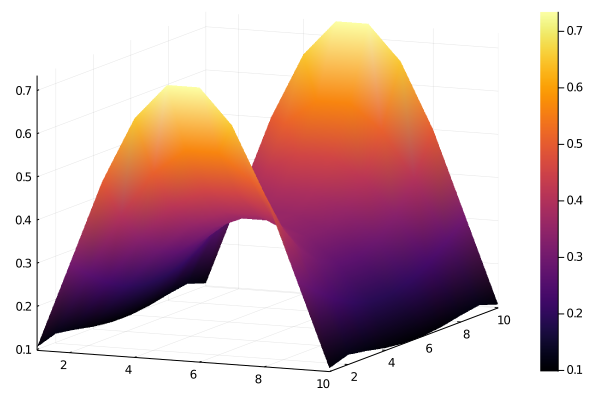

In [185]:
using Plots

surface(1:n,1:n,mat)